:#아파트 월간 매매수급동향과 매매가격지수
- 2019년 1월 ~ 2021년 11월
- 매매수급동향과 가격지수를 비교하여 사겠다는 사람들이 많아지면 가격지수가 어떻게 변하는지 분석하였습니다

출처 = https://www.reb.or.kr/r-one/main.do

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pandas import DataFrame 
import seaborn as sns

In [2]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [14]:
 rawData = pd.read_csv('/content/sample_data/월간_매매수급동향_아파트.csv')
rawData

,Unnamed: 0,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,강북지역,도심권,동북권,서북권,강남지역,서남권,동남권,경기,경부1권,경부2권,서해안권,동부1권,동부2권,경의권,경원권,인천,부산,중부산권,동부산권,서부산권,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
0,2012년 07월,80.516399,69.543147,89.135310,76.771047,81.191223,85.509709,94.375517,68.413856,72.980251,52.525253,77.906977,75.877193,63.703704,68.078176,57.939914,72.914219,70.358306,69.197708,70.568182,69.578313,87.878788,74.678112,89.007092,56.798867,62.253289,51.481481,51.176471,90.773810,102.631579,91.956522,79.953917,91.161616,-,93.357934,97.302158,88.989637,86.200717,102.091255,103.289474,90.322581,100.769231
1,2012년 08월,82.889044,71.922589,91.502617,81.468172,85.642633,86.832524,95.368073,70.601641,73.249551,57.070707,79.941860,67.105263,67.870370,74.267101,59.442060,74.706228,74.429967,72.779370,72.954545,81.626506,76.515152,77.253219,72.340426,62.606232,69.736842,67.777778,56.176471,86.607143,102.046784,96.956522,88.709677,89.646465,-,96.494465,97.661870,94.948187,94.444444,104.372624,97.894737,87.903226,93.076923
2,2012년 09월,84.054431,71.795685,93.683030,84.394251,89.341693,87.645631,96.546733,69.963537,74.685817,59.595960,81.831395,66.228070,65.092593,70.032573,58.583691,75.000000,76.710098,71.203438,78.522727,67.168675,81.818182,70.386266,83.333333,62.039660,72.039474,65.740741,71.470588,82.738095,104.678363,99.130435,98.617512,94.444444,-,99.077491,98.201439,98.704663,85.663082,101.330799,100.921053,94.959677,80.000000
3,2012년 10월,84.626657,71.430838,94.991278,85.549281,91.097179,88.361650,97.559967,68.960802,70.825853,55.050505,76.598837,67.105263,67.037037,66.612378,67.596567,75.293772,80.781759,68.624642,76.590909,76.807229,78.030303,75.965665,71.631206,60.481586,75.164474,70.185185,73.529412,84.821429,104.239766,100.000000,100.460830,96.717172,-,98.708487,99.100719,97.538860,87.634409,101.711027,100.921053,97.883065,90.000000
4,2012년 11월,86.092114,73.826142,95.726389,85.497947,90.721003,89.927184,99.028122,72.743847,78.994614,62.626263,87.063953,68.859649,66.296296,71.498371,59.442060,76.997650,83.713355,73.925501,77.272727,72.590361,78.787879,74.248927,78.014184,61.898017,72.697368,65.185185,74.117647,83.333333,105.701754,99.565217,101.382489,98.232323,-,100.922509,98.561151,100.259067,88.888889,99.619772,105.657895,98.588710,91.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2021년 07월,121.741429,128.656115,115.491732,118.491903,116.382515,123.105403,115.711916,124.951942,125.901254,115.944272,132.634731,111.538462,124.037736,121.795728,126.953125,131.221210,138.531514,126.761304,140.557591,120.484791,109.266409,122.992182,135.187761,126.406926,120.931980,118.971963,121.672772,122.862694,102.556350,114.921260,132.854578,112.700107,88.09523809523809,116.380952,122.097054,131.550069,116.087676,109.371782,111.484848,108.596838,113.555556
109,2021년 08월,123.881429,130.861820,117.572346,120.541498,118.157928,125.214483,118.073583,127.479815,129.075235,120.278638,134.550898,117.799642,125.943396,124.899866,127.300347,133.053026,141.325536,130.310200,140.903541,123.146388,113.706564,127.149964,128.789986,129.485329,122.585494,118.411215,125.824176,124.935233,104.260583,119.055118,132.001795,114.887940,88.69047619047619,118.714286,125.736568,133.333333,118.279570,112.358393,112.848485,111.106719,117.111111
110,2021년 09월,122.930000,128.538758,117.860640,119.731781,116.760672,124.369319,119.391041,125.278739,124.529781,123.993808,126.197605,119.856887,126.000000,125.000000,127.300347,129.833958,117.186485,126.708728,136.060236,123.479087,129.922780,142.181947,128.998609,130.880231,121.645998,117.383178,125.457875,123.510363,98.543156,120.708661,129.892280,117.289221,96.7261904761905,122.857143,120.320624,133.436214,126.344086,116.477858,112.424242,112.094862,115.777778
111,2021년 10월,113.145714,115.334617,111.167319,111.528340,110.274324,114.625677,112.369474,111.803153,108.699060,112.383901,109.311377,104.740608,114.792

In [15]:
rawData.rename(columns={'Unnamed: 0':'날짜'}, inplace=True)
rawData

,날짜,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,강북지역,도심권,동북권,서북권,강남지역,서남권,동남권,경기,경부1권,경부2권,서해안권,동부1권,동부2권,경의권,경원권,인천,부산,중부산권,동부산권,서부산권,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
0,2012년 07월,80.516399,69.543147,89.135310,76.771047,81.191223,85.509709,94.375517,68.413856,72.980251,52.525253,77.906977,75.877193,63.703704,68.078176,57.939914,72.914219,70.358306,69.197708,70.568182,69.578313,87.878788,74.678112,89.007092,56.798867,62.253289,51.481481,51.176471,90.773810,102.631579,91.956522,79.953917,91.161616,-,93.357934,97.302158,88.989637,86.200717,102.091255,103.289474,90.322581,100.769231
1,2012년 08월,82.889044,71.922589,91.502617,81.468172,85.642633,86.832524,95.368073,70.601641,73.249551,57.070707,79.941860,67.105263,67.870370,74.267101,59.442060,74.706228,74.429967,72.779370,72.954545,81.626506,76.515152,77.253219,72.340426,62.606232,69.736842,67.777778,56.176471,86.607143,102.046784,96.956522,88.709677,89.646465,-,96.494465,97.661870,94.948187,94.444444,104.372624,97.894737,87.903226,93.076923
2,2012년 09월,84.054431,71.795685,93.683030,84.394251,89.341693,87.645631,96.546733,69.963537,74.685817,59.595960,81.831395,66.228070,65.092593,70.032573,58.583691,75.000000,76.710098,71.203438,78.522727,67.168675,81.818182,70.386266,83.333333,62.039660,72.039474,65.740741,71.470588,82.738095,104.678363,99.130435,98.617512,94.444444,-,99.077491,98.201439,98.704663,85.663082,101.330799,100.921053,94.959677,80.000000
3,2012년 10월,84.626657,71.430838,94.991278,85.549281,91.097179,88.361650,97.559967,68.960802,70.825853,55.050505,76.598837,67.105263,67.037037,66.612378,67.596567,75.293772,80.781759,68.624642,76.590909,76.807229,78.030303,75.965665,71.631206,60.481586,75.164474,70.185185,73.529412,84.821429,104.239766,100.000000,100.460830,96.717172,-,98.708487,99.100719,97.538860,87.634409,101.711027,100.921053,97.883065,90.000000
4,2012년 11월,86.092114,73.826142,95.726389,85.497947,90.721003,89.927184,99.028122,72.743847,78.994614,62.626263,87.063953,68.859649,66.296296,71.498371,59.442060,76.997650,83.713355,73.925501,77.272727,72.590361,78.787879,74.248927,78.014184,61.898017,72.697368,65.185185,74.117647,83.333333,105.701754,99.565217,101.382489,98.232323,-,100.922509,98.561151,100.259067,88.888889,99.619772,105.657895,98.588710,91.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2021년 07월,121.741429,128.656115,115.491732,118.491903,116.382515,123.105403,115.711916,124.951942,125.901254,115.944272,132.634731,111.538462,124.037736,121.795728,126.953125,131.221210,138.531514,126.761304,140.557591,120.484791,109.266409,122.992182,135.187761,126.406926,120.931980,118.971963,121.672772,122.862694,102.556350,114.921260,132.854578,112.700107,88.09523809523809,116.380952,122.097054,131.550069,116.087676,109.371782,111.484848,108.596838,113.555556
109,2021년 08월,123.881429,130.861820,117.572346,120.541498,118.157928,125.214483,118.073583,127.479815,129.075235,120.278638,134.550898,117.799642,125.943396,124.899866,127.300347,133.053026,141.325536,130.310200,140.903541,123.146388,113.706564,127.149964,128.789986,129.485329,122.585494,118.411215,125.824176,124.935233,104.260583,119.055118,132.001795,114.887940,88.69047619047619,118.714286,125.736568,133.333333,118.279570,112.358393,112.848485,111.106719,117.111111
110,2021년 09월,122.930000,128.538758,117.860640,119.731781,116.760672,124.369319,119.391041,125.278739,124.529781,123.993808,126.197605,119.856887,126.000000,125.000000,127.300347,129.833958,117.186485,126.708728,136.060236,123.479087,129.922780,142.181947,128.998609,130.880231,121.645998,117.383178,125.457875,123.510363,98.543156,120.708661,129.892280,117.289221,96.7261904761905,122.857143,120.320624,133.436214,126.344086,116.477858,112.424242,112.094862,115.777778
111,2021년 10월,113.145714,115.334617,111.167319,111.528340,110.274324,114.625677,112.369474,111.803153,108.699060,112.383901,109.311377,104.740608,114.792453,112.

In [16]:
rawData1 = rawData.drop(columns=['전국','수도권','지방권','6대광역시','5대광역시','9개도','8개도'], inplace=True)

In [28]:
rawData

,날짜,서울,강북지역,도심권,동북권,서북권,강남지역,서남권,동남권,경기,경부1권,경부2권,서해안권,동부1권,동부2권,경의권,경원권,인천,부산,중부산권,동부산권,서부산권,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
0,2012년 07월,68.413856,72.980251,52.525253,77.906977,75.877193,63.703704,68.078176,57.939914,72.914219,70.358306,69.197708,70.568182,69.578313,87.878788,74.678112,89.007092,56.798867,62.253289,51.481481,51.176471,90.773810,102.631579,91.956522,79.953917,91.161616,-,93.357934,97.302158,88.989637,86.200717,102.091255,103.289474,90.322581,100.769231
1,2012년 08월,70.601641,73.249551,57.070707,79.941860,67.105263,67.870370,74.267101,59.442060,74.706228,74.429967,72.779370,72.954545,81.626506,76.515152,77.253219,72.340426,62.606232,69.736842,67.777778,56.176471,86.607143,102.046784,96.956522,88.709677,89.646465,-,96.494465,97.661870,94.948187,94.444444,104.372624,97.894737,87.903226,93.076923
2,2012년 09월,69.963537,74.685817,59.595960,81.831395,66.228070,65.092593,70.032573,58.583691,75.000000,76.710098,71.203438,78.522727,67.168675,81.818182,70.386266,83.333333,62.039660,72.039474,65.740741,71.470588,82.738095,104.678363,99.130435,98.617512,94.444444,-,99.077491,98.201439,98.704663,85.663082,101.330799,100.921053,94.959677,80.000000
3,2012년 10월,68.960802,70.825853,55.050505,76.598837,67.105263,67.037037,66.612378,67.596567,75.293772,80.781759,68.624642,76.590909,76.807229,78.030303,75.965665,71.631206,60.481586,75.164474,70.185185,73.529412,84.821429,104.239766,100.000000,100.460830,96.717172,-,98.708487,99.100719,97.538860,87.634409,101.711027,100.921053,97.883065,90.000000
4,2012년 11월,72.743847,78.994614,62.626263,87.063953,68.859649,66.296296,71.498371,59.442060,76.997650,83.713355,73.925501,77.272727,72.590361,78.787879,74.248927,78.014184,61.898017,72.697368,65.185185,74.117647,83.333333,105.701754,99.565217,101.382489,98.232323,-,100.922509,98.561151,100.259067,88.888889,99.619772,105.657895,98.588710,91.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2021년 07월,124.951942,125.901254,115.944272,132.634731,111.538462,124.037736,121.795728,126.953125,131.221210,138.531514,126.761304,140.557591,120.484791,109.266409,122.992182,135.187761,126.406926,120.931980,118.971963,121.672772,122.862694,102.556350,114.921260,132.854578,112.700107,88.09523809523809,116.380952,122.097054,131.550069,116.087676,109.371782,111.484848,108.596838,113.555556
109,2021년 08월,127.479815,129.075235,120.278638,134.550898,117.799642,125.943396,124.899866,127.300347,133.053026,141.325536,130.310200,140.903541,123.146388,113.706564,127.149964,128.789986,129.485329,122.585494,118.411215,125.824176,124.935233,104.260583,119.055118,132.001795,114.887940,88.69047619047619,118.714286,125.736568,133.333333,118.279570,112.358393,112.848485,111.106719,117.111111
110,2021년 09월,125.278739,124.529781,123.993808,126.197605,119.856887,126.000000,125.000000,127.300347,129.833958,117.186485,126.708728,136.060236,123.479087,129.922780,142.181947,128.998609,130.880231,121.645998,117.383178,125.457875,123.510363,98.543156,120.708661,129.892280,117.289221,96.7261904761905,122.857143,120.320624,133.436214,126.344086,116.477858,112.424242,112.094862,115.777778
111,2021년 10월,111.803153,108.699060,112.383901,109.311377,104.740608,114.792453,112.917223,117.230903,117.102303,113.417804,116.246057,117.704518,112.167300,121.621622,126.154940,113.073713,116.233766,115.332582,114.906542,118.009768,113.082902,96.536559,117.086614,113.913824,109.018143,95.23809523809523,109.428571,115.641248,115.089163,117.411084,111.791967,108.696970,110.217391,118.222222


In [30]:
rawData2=rawData.iloc[:,0:2]
rawData2

,날짜,서울
0,2012년 07월,68.413856
1,2012년 08월,70.601641
2,2012년 09월,69.963537
3,2012년 10월,68.960802
4,2012년 11월,72.743847
...,...,...
108,2021년 07월,124.951942
109,2021년 08월,127.479815
110,2021년 09월,125.278739
111,2021년 10월,111.803153


In [31]:
rawData2=rawData2.iloc[:,1:]
rawData2

,서울
0,68.413856
1,70.601641
2,69.963537
3,68.960802
4,72.743847
...,...
108,124.951942
109,127.479815
110,125.278739
111,111.803153


In [32]:
rawData2.rename(columns={'서울':'수급동향'},inplace=True)
rawData2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,수급동향
0,68.413856
1,70.601641
2,69.963537
3,68.960802
4,72.743847
...,...
108,124.951942
109,127.479815
110,125.278739
111,111.803153


In [19]:
 apt = pd.read_csv('/content/sample_data/월간_매매가격지수_아파트.csv')
apt

,Unnamed: 0,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,강북지역,도심권,종로구,중구,용산구,동북권,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,서북권,은평구,서대문구,마포구,강남지역,서남권,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,동남권,서초구,강남구,송파구,...,남원시,김제시,전남,목포시,여수시,순천시,나주시,광양시,무안군,경북,포항시,남구.4,북구.4,경주시,김천시,안동시,구미시,영주시,영천시,상주시,문경시,경산시,칠곡군,경남,창원시,의창구,성산구,마산합포구,마산회원구,진해구,진주시,통영시,사천시,김해시,밀양시,거제시,양산시,제주,제주시,서귀포시
0,2003년 11월,55.408061,52.391121,58.161120,53.180789,53.023918,57.955852,62.961018,52.489325,51.835096,-,56.536446,60.116747,49.587010,-,50.295204,57.772003,53.467842,58.496650,56.999063,49.448288,54.250969,45.790635,-,58.580586,55.416559,50.588289,52.986942,-,53.802635,54.513510,52.537575,52.739635,49.742691,50.973900,53.511621,-,50.468904,53.718390,54.574461,...,-,-,59.138511,69.241810,-,51.181571,-,57.248185,-,67.674194,62.902108,58.290170,66.179615,-,-,-,68.874231,-,-,-,-,62.339401,-,64.977698,62.534124,62.184878,54.177211,78.468111,71.391092,-,69.370720,-,-,65.687908,-,64.408422,69.000908,53.577593,52.789339,-
1,2003년 12월,55.092318,52.081937,57.843918,52.746056,52.571368,57.772830,62.868141,52.091964,51.648519,-,56.416567,59.542547,49.347822,-,50.093270,58.009050,53.179373,58.193441,56.936353,49.184471,54.063700,45.580792,-,58.413246,55.811166,50.120106,52.414538,-,53.400259,53.897316,52.076230,52.541433,49.499484,51.013785,53.306246,-,49.659332,52.993462,53.762715,...,-,-,59.067053,69.284016,-,51.009465,-,57.179031,-,67.586407,62.704780,57.913878,66.112931,-,-,-,68.946852,-,-,-,-,62.236312,-,64.732041,61.507162,59.429156,53.177059,78.855522,71.072480,-,69.766373,-,-,66.195615,-,67.016026,67.930278,53.498832,52.711736,-
2,2004년 01월,54.959520,51.904646,57.773837,52.648115,52.481297,57.626558,62.832586,51.936493,51.585445,-,56.279525,59.606992,49.607329,-,50.264376,57.997747,53.179929,57.935177,56.923081,48.984213,53.809987,45.476929,-,58.305631,55.887712,50.069251,52.182716,-,53.145538,53.890899,51.745038,52.588608,49.319186,50.787616,53.191008,-,49.209024,52.817450,53.461801,...,-,-,59.006206,69.202359,59.1791447676758,50.957642,-,57.138263,-,67.282245,62.691841,58.048165,65.992676,-,-,-,68.302035,-,-,-,-,61.944659,-,64.554927,61.309505,59.900359,52.522416,78.918458,71.030707,55.1167393370722,69.804956,-,-,66.156322,-,66.482205,67.658008,53.601192,52.812591,-
3,2004년 02월,55.144495,52.070319,57.980170,52.770763,52.612291,57.794846,63.140547,52.246176,51.761428,-,56.587524,59.845321,50.300318,-,50.809363,58.249212,53.454268,58.064430,56.755840,49.034583,53.994576,45.519375,-,58.534314,56.165980,50.238334,52.602883,-,53.050683,53.994979,51.889049,53.102963,49.313365,50.841568,53.256259,-,49.690013,53.740453,54.450882,...,-,-,58.904183,68.657182,59.3899411811852,50.886256,-,57.237870,-,67.387326,62.737684,57.981394,66.120515,-,-,-,68.585639,-,-,-,-,61.871855,-,64.800287,61.393629,59.778132,52.615558,78.979607,71.216362,55.3488311100563,70.239599,-,-,66.003152,-,68.966144,67.542576,53.541693,52.753967,-
4,2004년 03월,55.364299,52.251846,58.245594,52.941822,52.810683,58.022590,63.492588,52.519256,51.911584,-,56.628455,60.050523,50.800629,-,51.222364,58.723262,53.573421,58.275292,56.783673,49.062777,54.216556,45.574009,-,58.358024,56.211258,50.388474,52.977995,-,53.218612,54.245425,52.310201,53.304831,49.546900,50.943378,53.370222,-,50.041699,54.093270,55.125285,...,-,-,58.731952,68.192565,59.0290974691569,51.087502,-,57.164888,-,67.573541,62.822799,57.993426,66.258891,-,-,-,68.986226,-,-,-,-,61.892664,-,65.145899,61.536661,59.407019,52.878935,79.615767,71.165535,55.6659567229384,70.864120,-,-,66.502947,-,70.116246,67.711941,53.491140,52.704158,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2021년 07월,101.206901,101.642510,100.802709,101.094484,100.849777,101.399695,100.799986,100.811666,100.825459,100.50892036840015

In [20]:
apt.rename(columns={'Unnamed: 0':'날짜'}, inplace=True)
apt

,날짜,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,강북지역,도심권,종로구,중구,용산구,동북권,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,서북권,은평구,서대문구,마포구,강남지역,서남권,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,동남권,서초구,강남구,송파구,...,남원시,김제시,전남,목포시,여수시,순천시,나주시,광양시,무안군,경북,포항시,남구.4,북구.4,경주시,김천시,안동시,구미시,영주시,영천시,상주시,문경시,경산시,칠곡군,경남,창원시,의창구,성산구,마산합포구,마산회원구,진해구,진주시,통영시,사천시,김해시,밀양시,거제시,양산시,제주,제주시,서귀포시
0,2003년 11월,55.408061,52.391121,58.161120,53.180789,53.023918,57.955852,62.961018,52.489325,51.835096,-,56.536446,60.116747,49.587010,-,50.295204,57.772003,53.467842,58.496650,56.999063,49.448288,54.250969,45.790635,-,58.580586,55.416559,50.588289,52.986942,-,53.802635,54.513510,52.537575,52.739635,49.742691,50.973900,53.511621,-,50.468904,53.718390,54.574461,...,-,-,59.138511,69.241810,-,51.181571,-,57.248185,-,67.674194,62.902108,58.290170,66.179615,-,-,-,68.874231,-,-,-,-,62.339401,-,64.977698,62.534124,62.184878,54.177211,78.468111,71.391092,-,69.370720,-,-,65.687908,-,64.408422,69.000908,53.577593,52.789339,-
1,2003년 12월,55.092318,52.081937,57.843918,52.746056,52.571368,57.772830,62.868141,52.091964,51.648519,-,56.416567,59.542547,49.347822,-,50.093270,58.009050,53.179373,58.193441,56.936353,49.184471,54.063700,45.580792,-,58.413246,55.811166,50.120106,52.414538,-,53.400259,53.897316,52.076230,52.541433,49.499484,51.013785,53.306246,-,49.659332,52.993462,53.762715,...,-,-,59.067053,69.284016,-,51.009465,-,57.179031,-,67.586407,62.704780,57.913878,66.112931,-,-,-,68.946852,-,-,-,-,62.236312,-,64.732041,61.507162,59.429156,53.177059,78.855522,71.072480,-,69.766373,-,-,66.195615,-,67.016026,67.930278,53.498832,52.711736,-
2,2004년 01월,54.959520,51.904646,57.773837,52.648115,52.481297,57.626558,62.832586,51.936493,51.585445,-,56.279525,59.606992,49.607329,-,50.264376,57.997747,53.179929,57.935177,56.923081,48.984213,53.809987,45.476929,-,58.305631,55.887712,50.069251,52.182716,-,53.145538,53.890899,51.745038,52.588608,49.319186,50.787616,53.191008,-,49.209024,52.817450,53.461801,...,-,-,59.006206,69.202359,59.1791447676758,50.957642,-,57.138263,-,67.282245,62.691841,58.048165,65.992676,-,-,-,68.302035,-,-,-,-,61.944659,-,64.554927,61.309505,59.900359,52.522416,78.918458,71.030707,55.1167393370722,69.804956,-,-,66.156322,-,66.482205,67.658008,53.601192,52.812591,-
3,2004년 02월,55.144495,52.070319,57.980170,52.770763,52.612291,57.794846,63.140547,52.246176,51.761428,-,56.587524,59.845321,50.300318,-,50.809363,58.249212,53.454268,58.064430,56.755840,49.034583,53.994576,45.519375,-,58.534314,56.165980,50.238334,52.602883,-,53.050683,53.994979,51.889049,53.102963,49.313365,50.841568,53.256259,-,49.690013,53.740453,54.450882,...,-,-,58.904183,68.657182,59.3899411811852,50.886256,-,57.237870,-,67.387326,62.737684,57.981394,66.120515,-,-,-,68.585639,-,-,-,-,61.871855,-,64.800287,61.393629,59.778132,52.615558,78.979607,71.216362,55.3488311100563,70.239599,-,-,66.003152,-,68.966144,67.542576,53.541693,52.753967,-
4,2004년 03월,55.364299,52.251846,58.245594,52.941822,52.810683,58.022590,63.492588,52.519256,51.911584,-,56.628455,60.050523,50.800629,-,51.222364,58.723262,53.573421,58.275292,56.783673,49.062777,54.216556,45.574009,-,58.358024,56.211258,50.388474,52.977995,-,53.218612,54.245425,52.310201,53.304831,49.546900,50.943378,53.370222,-,50.041699,54.093270,55.125285,...,-,-,58.731952,68.192565,59.0290974691569,51.087502,-,57.164888,-,67.573541,62.822799,57.993426,66.258891,-,-,-,68.986226,-,-,-,-,61.892664,-,65.145899,61.536661,59.407019,52.878935,79.615767,71.165535,55.6659567229384,70.864120,-,-,66.502947,-,70.116246,67.711941,53.491140,52.704158,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2021년 07월,101.206901,101.642510,100.802709,101.094484,100.849777,101.399695,100.799986,100.811666,100.825459,100.50892036840015,100.389

In [21]:
apt1 = apt.drop(columns=['전국','수도권','지방권','6대광역시','5대광역시','9개도','8개도'], inplace=True)

In [33]:
apt

,날짜,서울,강북지역,도심권,종로구,중구,용산구,동북권,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,서북권,은평구,서대문구,마포구,강남지역,서남권,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,동남권,서초구,강남구,송파구,강동구,경기,경부1권,과천시,안양시,만안구,동안구,...,남원시,김제시,전남,목포시,여수시,순천시,나주시,광양시,무안군,경북,포항시,남구.4,북구.4,경주시,김천시,안동시,구미시,영주시,영천시,상주시,문경시,경산시,칠곡군,경남,창원시,의창구,성산구,마산합포구,마산회원구,진해구,진주시,통영시,사천시,김해시,밀양시,거제시,양산시,제주,제주시,서귀포시
0,2003년 11월,52.489325,51.835096,-,56.536446,60.116747,49.587010,-,50.295204,57.772003,53.467842,58.496650,56.999063,49.448288,54.250969,45.790635,-,58.580586,55.416559,50.588289,52.986942,-,53.802635,54.513510,52.537575,52.739635,49.742691,50.973900,53.511621,-,50.468904,53.718390,54.574461,54.998687,52.509752,-,47.859829,43.495212,49.255967,41.075638,...,-,-,59.138511,69.241810,-,51.181571,-,57.248185,-,67.674194,62.902108,58.290170,66.179615,-,-,-,68.874231,-,-,-,-,62.339401,-,64.977698,62.534124,62.184878,54.177211,78.468111,71.391092,-,69.370720,-,-,65.687908,-,64.408422,69.000908,53.577593,52.789339,-
1,2003년 12월,52.091964,51.648519,-,56.416567,59.542547,49.347822,-,50.093270,58.009050,53.179373,58.193441,56.936353,49.184471,54.063700,45.580792,-,58.413246,55.811166,50.120106,52.414538,-,53.400259,53.897316,52.076230,52.541433,49.499484,51.013785,53.306246,-,49.659332,52.993462,53.762715,53.871149,52.279256,-,46.559800,43.337394,49.032399,40.942205,...,-,-,59.067053,69.284016,-,51.009465,-,57.179031,-,67.586407,62.704780,57.913878,66.112931,-,-,-,68.946852,-,-,-,-,62.236312,-,64.732041,61.507162,59.429156,53.177059,78.855522,71.072480,-,69.766373,-,-,66.195615,-,67.016026,67.930278,53.498832,52.711736,-
2,2004년 01월,51.936493,51.585445,-,56.279525,59.606992,49.607329,-,50.264376,57.997747,53.179929,57.935177,56.923081,48.984213,53.809987,45.476929,-,58.305631,55.887712,50.069251,52.182716,-,53.145538,53.890899,51.745038,52.588608,49.319186,50.787616,53.191008,-,49.209024,52.817450,53.461801,53.516039,52.071675,-,45.681078,43.244447,49.009067,40.825937,...,-,-,59.006206,69.202359,59.1791447676758,50.957642,-,57.138263,-,67.282245,62.691841,58.048165,65.992676,-,-,-,68.302035,-,-,-,-,61.944659,-,64.554927,61.309505,59.900359,52.522416,78.918458,71.030707,55.1167393370722,69.804956,-,-,66.156322,-,66.482205,67.658008,53.601192,52.812591,-
3,2004년 02월,52.246176,51.761428,-,56.587524,59.845321,50.300318,-,50.809363,58.249212,53.454268,58.064430,56.755840,49.034583,53.994576,45.519375,-,58.534314,56.165980,50.238334,52.602883,-,53.050683,53.994979,51.889049,53.102963,49.313365,50.841568,53.256259,-,49.690013,53.740453,54.450882,54.513376,52.145111,-,46.697987,43.094184,49.239247,40.545770,...,-,-,58.904183,68.657182,59.3899411811852,50.886256,-,57.237870,-,67.387326,62.737684,57.981394,66.120515,-,-,-,68.585639,-,-,-,-,61.871855,-,64.800287,61.393629,59.778132,52.615558,78.979607,71.216362,55.3488311100563,70.239599,-,-,66.003152,-,68.966144,67.542576,53.541693,52.753967,-
4,2004년 03월,52.519256,51.911584,-,56.628455,60.050523,50.800629,-,51.222364,58.723262,53.573421,58.275292,56.783673,49.062777,54.216556,45.574009,-,58.358024,56.211258,50.388474,52.977995,-,53.218612,54.245425,52.310201,53.304831,49.546900,50.943378,53.370222,-,50.041699,54.093270,55.125285,55.540028,52.285584,-,47.315903,43.203604,49.283414,40.676515,...,-,-,58.731952,68.192565,59.0290974691569,51.087502,-,57.164888,-,67.573541,62.822799,57.993426,66.258891,-,-,-,68.986226,-,-,-,-,61.892664,-,65.145899,61.536661,59.407019,52.878935,79.615767,71.165535,55.6659567229384,70.864120,-,-,66.502947,-,70.116246,67.711941,53.491140,52.704158,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2021년 07월,100.811666,100.825459,100.50892036840015,100.389827,100.377028,100.636426,100.9235828254583,100.464196,100.532913,100.519003,100.809150,100.670682,100.676997,101.141850

In [34]:
apt2=apt.iloc[:,:2]
apt2

,날짜,서울
0,2003년 11월,52.489325
1,2003년 12월,52.091964
2,2004년 01월,51.936493
3,2004년 02월,52.246176
4,2004년 03월,52.519256
...,...,...
212,2021년 07월,100.811666
213,2021년 08월,101.739971
214,2021년 09월,102.657125
215,2021년 10월,103.504915


In [35]:
apt2.rename(columns={'서울':'가격지수'}, inplace=True)
apt2

,날짜,가격지수
0,2003년 11월,52.489325
1,2003년 12월,52.091964
2,2004년 01월,51.936493
3,2004년 02월,52.246176
4,2004년 03월,52.519256
...,...,...
212,2021년 07월,100.811666
213,2021년 08월,101.739971
214,2021년 09월,102.657125
215,2021년 10월,103.504915


In [42]:
apt3=apt2.iloc[104:,:]
apt3

,날짜,가격지수
104,2012년 07월,76.455652
105,2012년 08월,75.769533
106,2012년 09월,75.264310
107,2012년 10월,74.796751
108,2012년 11월,74.420026
...,...,...
212,2021년 07월,100.811666
213,2021년 08월,101.739971
214,2021년 09월,102.657125
215,2021년 10월,103.504915


In [44]:
apt4=apt3.reset_index(drop=True)
apt4

,날짜,가격지수
0,2012년 07월,76.455652
1,2012년 08월,75.769533
2,2012년 09월,75.264310
3,2012년 10월,74.796751
4,2012년 11월,74.420026
...,...,...
108,2021년 07월,100.811666
109,2021년 08월,101.739971
110,2021년 09월,102.657125
111,2021년 10월,103.504915


In [46]:
add = pd.concat([apt4,rawData2], axis=1)
add

,날짜,가격지수,수급동향
0,2012년 07월,76.455652,68.413856
1,2012년 08월,75.769533,70.601641
2,2012년 09월,75.264310,69.963537
3,2012년 10월,74.796751,68.960802
4,2012년 11월,74.420026,72.743847
...,...,...,...
108,2021년 07월,100.811666,124.951942
109,2021년 08월,101.739971,127.479815
110,2021년 09월,102.657125,125.278739
111,2021년 10월,103.504915,111.803153


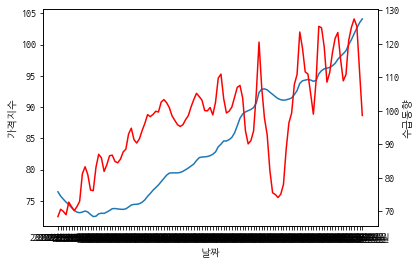

In [48]:
sns.lineplot( data=add, x='날짜', y='가격지수')
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=add, x='날짜', y='수급동향', ax=ax2, color='red')


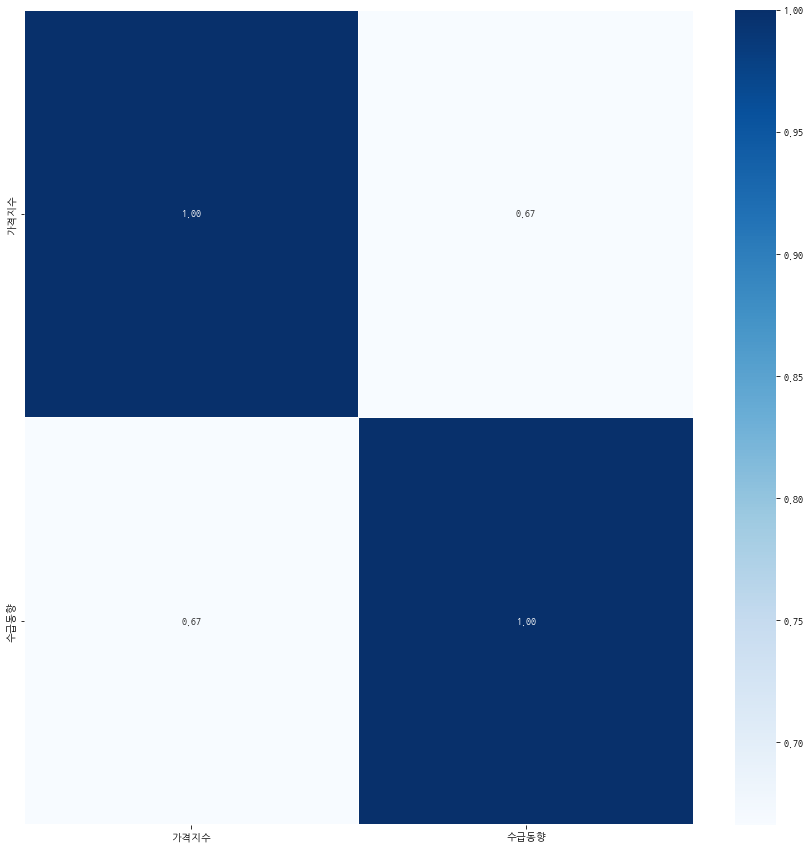

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(data = add.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

결론
- 연관성이 있어보인다.
- 아파트를 팔겠다는 사람이 사겠다는 사람보다 많아지면서 매매수급지수 낮아졌다
- 집값이 올라갈수록 파는 사람이 더욱 늘어난다
- 매매수급지수는 부동산원의 회원 중개업소 설문과 인터넷 매물 건수 등을 분석해 수요와 공급 비중을 지수화한 것으로, 기준선인 100 아래로 떨어져 수치가 낮아질수록 매수심리가 약하다는 의미다.

# 주택시장 소비심리지수와 월간 주택매매가격지수 
- 사람들이 가격지수의 변동에 따라 사람들의 주택시장에서의 소비심리를 파악하기 위해서 분석하였습니다.

출처 - https://www.reb.or.kr/r-one/statistics/statisticsViewer.do?menuId=HOUSE_21111

In [58]:
 data = pd.read_csv('/content/sample_data/주택시장_소비심리지수_20220117164031.csv', encoding='MS949')
data

,시도별(1),시도별(2),2014. 01,2014. 02,2014. 03,2014. 04,2014. 05,2014. 06,2014. 07,2014. 08,2014. 09,2014. 10,2014. 11,2014. 12,2015. 01,2015. 02,2015. 03,2015. 04,2015. 05,2015. 06,2015. 07,2015. 08,2015. 09,2015. 10,2015. 11,2015. 12,2016. 01,2016. 02,2016. 03,2016. 04,2016. 05,2016. 06,2016. 07,2016. 08,2016. 09,2016. 10,2016. 11,2016. 12,2017. 01,2017. 02,...,2018. 08,2018. 09,2018. 10,2018. 11,2018. 12,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04,2020. 05,2020. 06,2020. 07,2020. 08,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05,2021. 06,2021. 07,2021. 08,2021. 09,2021. 10,2021. 11
0,전국,소계,128.0,133.0,121.2,120.1,117.6,111.0,117.9,126.1,129.1,130.7,124.5,114.5,129.8,132.2,134.6,136.3,132.7,126.0,132.3,131.6,129.0,132.6,124.0,109.2,113.8,116.0,116.5,118.4,118.3,117.8,121.0,124.1,124.2,125.2,114.6,105.3,108.3,112.3,...,107.6,111.3,103.8,96.3,90.6,89.9,92.7,90.7,86.8,91.1,98.5,102.6,104.6,109.8,114.5,116.4,116.7,115.3,118.3,108.6,104.6,111.6,122.8,123.8,122.8,123.7,131.3,134.9,130.6,127.8,125.5,121.7,119.4,123.7,127.4,128.8,130.3,129.3,120.7,112.7
1,수도권,소계,129.1,134.8,120.6,118.4,116.4,110.4,118.5,128.8,131.1,132.2,125.2,115.2,134.0,136.3,138.9,141.1,137.6,128.6,136.4,135.5,133.1,137.9,128.1,111.4,117.7,120.2,120.1,124.7,125.3,124.0,128.3,131.2,128.4,129.8,116.5,104.8,109.2,114.0,...,115.9,119.3,110.0,100.2,91.2,90.7,94.3,91.8,89.6,94.1,103.0,109.4,110.7,115.4,122.1,122.1,120.4,119.0,123.5,112.9,106.5,113.6,128.4,130.9,127.7,126.0,132.0,134.5,133.5,131.5,129.5,123.5,121.8,127.5,131.3,133.3,135.1,131.8,120.6,111.6
2,수도권,서울특별시,132.3,136.1,119.3,118.5,115.8,108.5,117.0,128.1,130.9,132.3,125.1,116.2,137.3,140.5,142.6,143.7,141.4,132.7,142.5,140.0,134.8,141.8,131.9,112.5,119.8,122.3,121.2,126.6,128.8,128.9,131.7,133.4,129.7,131.1,115.5,103.4,108.8,114.4,...,129.7,128.9,117.1,107.2,93.7,91.5,94.5,93.3,91.1,98.6,112.2,121.1,120.1,124.4,133.6,132.4,128.4,118.5,122.7,111.1,103.8,114.2,135.2,143.3,135.0,130.2,134.6,136.6,133.7,131.7,127.1,117.9,118.2,126.2,130.0,133.0,135.9,132.1,119.9,111.9
3,수도권,인천광역시,125.4,131.7,126.1,122.3,119.4,113.0,117.7,127.1,129.3,127.4,123.9,115.8,133.0,134.2,139.3,139.5,135.8,126.3,133.1,133.7,132.5,135.3,126.3,109.7,116.9,118.4,121.1,122.7,122.3,120.4,126.1,130.3,129.1,128.8,117.0,107.1,112.0,118.8,...,104.0,111.0,105.4,96.5,89.6,93.2,96.0,94.1,92.6,95.2,100.3,105.2,104.6,112.6,117.7,114.1,112.5,116.5,125.7,119.8,111.7,117.2,118.5,111.7,114.2,118.0,122.6,125.9,128.7,129.2,134.8,134.0,131.7,135.3,136.0,134.4,137.5,134.1,122.9,109.6
4,수도권,경기도,128.2,134.7,120.2,117.4,116.1,110.9,119.5,129.5,131.7,133.2,125.6,114.6,132.4,134.4,136.8,139.9,135.9,126.7,133.7,133.3,132.3,136.3,126.4,111.1,116.6,119.4,119.4,124.0,124.0,121.9,126.8,130.2,127.5,129.4,117.1,105.0,108.8,112.8,...,110.5,115.6,108.1,97.0,90.1,89.7,93.9,90.5,88.1,91.2,98.2,103.6,106.7,110.9,116.5,117.9,117.6,119.8,123.5,112.4,106.9,112.5,126.7,127.9,126.4,125.4,132.6,135.2,134.5,131.8,129.7,124.4,121.6,126.7,131.1,133.3,134.2,131.2,120.6,111.9
5,비수도권,소계,126.4,130.7,122.2,122.5,119.3,112.0,117.3,122.8,126.5,128.8,123.6,113.6,124.7,127.2,129.2,130.8,126.9,122.4,126.9,126.6,123.8,126.2,119.1,106.5,109.3,111.2,112.0,110.9,109.8,109.9,112.5,115.8,119.0,119.7,112.8,105.9,107.2,110.2,...,96.6,101.0,97.7,91.8,90.2,89.6,91.7,89.7,84.0,87.8,93.3,94.8,97.5,103.3,105.8,109.8,112.1,111.1,112.6,104.1,102.8,109.6,116.2,115.2,116.9,120.9,130.3,135.2,127.3,123.4,121.6,120.3,117.5,119.7,123.3,124.0,125.3,126.7,121.1,113.7
6,비수도권,부산광역시,123.3,130.0,124.8,125.3,120.8,112.9,119.0,124.1,129.9,130.9,127.0,116.0,128.1,129.9,134.5,136.8,132.8,127.8,133.6,132.6,130.1,137.1,129.4,113.8,117.7,121.0,122.9,126.4,124.8,123.7,128.7,131.4,133.7,138.7,127.4,112.2,115.6,115.5,...,91.5,96.9,93.8,87.9,87.1,89.7,89.8,86.8,80.9,83.8,88.6,88.0,92.8,101.0,102.3,115.0,112.2,107.1,107.3,100.3,98.3,102.7,113.8,109.4,112.4,118.9,135.6,139.0,120.3,117.4,117.5,117.5,116.2,119.

In [59]:
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
시도별(1),전국,수도권,수도권,수도권,수도권,비수도권,비수도권,비수도권,비수도권,비수도권,비수도권,비수도권,비수도권,비수도권,비수도권,비수도권,비수도권,비수도권,비수도권,비수도권
시도별(2),소계,소계,서울특별시,인천광역시,경기도,소계,부산광역시,대구광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2014. 01,128.0,129.1,132.3,125.4,128.2,126.4,123.3,137.8,128.6,125.4,123.6,-,129.3,130.6,139.0,114.3,109.4,132.2,122.8,-
2014. 02,133.0,134.8,136.1,131.7,134.7,130.7,130.0,141.5,133.4,127.0,130.6,-,133.3,130.8,141.8,119.5,111.7,133.2,129.2,-
2014. 03,121.2,120.6,119.3,126.1,120.2,122.2,124.8,129.5,122.3,112.4,128.7,-,123.9,122.9,128.4,112.5,107.2,123.9,119.2,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021. 07,128.8,133.3,133,134.4,133.3,124,123.8,114.6,129.9,131.7,122.7,101.8,135.7,128.2,130.5,129.9,111.4,121.2,126.8,126.6
2021. 08,130.3,135.1,135.9,137.5,134.2,125.3,126.6,114.1,127.7,129.7,127.9,101.8,135,128.9,134.2,129.3,112.9,127.2,131.4,121.8
2021. 09,129.3,131.8,132.1,134.1,131.2,126.7,125.3,112.2,130.3,133.2,124.8,103.3,139,131.1,139.4,130.9,115.7,129.2,133.3,132.3
2021. 10,120.7,120.6,119.9,122.9,120.6,121.1,118.2,108.1,128.7,124.7,116.1,101.1,132.8,126.4,129.2,123.5,111.6,129.5,125.5,127


In [63]:
data2 = data.drop(columns=['소계','소계'], inplace=True)
data

,서울특별시,인천광역시,경기도,부산광역시,대구광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2014. 01,132.3,125.4,128.2,123.3,137.8,128.6,125.4,123.6,-,129.3,130.6,139.0,114.3,109.4,132.2,122.8,-
2014. 02,136.1,131.7,134.7,130.0,141.5,133.4,127.0,130.6,-,133.3,130.8,141.8,119.5,111.7,133.2,129.2,-
2014. 03,119.3,126.1,120.2,124.8,129.5,122.3,112.4,128.7,-,123.9,122.9,128.4,112.5,107.2,123.9,119.2,-
2014. 04,118.5,122.3,117.4,125.3,131.5,121.7,111.6,128.8,-,116.7,125.7,133.2,111.3,106.8,124.0,118.2,-
2014. 05,115.8,119.4,116.1,120.8,129.0,119.1,113.8,125.4,-,112.6,119.7,129.2,110.7,100.8,123.7,114.5,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021. 07,133,134.4,133.3,123.8,114.6,129.9,131.7,122.7,101.8,135.7,128.2,130.5,129.9,111.4,121.2,126.8,126.6
2021. 08,135.9,137.5,134.2,126.6,114.1,127.7,129.7,127.9,101.8,135,128.9,134.2,129.3,112.9,127.2,131.4,121.8
2021. 09,132.1,134.1,131.2,125.3,112.2,130.3,133.2,124.8,103.3,139,131.1,139.4,130.9,115.7,129.2,133.3,132.3
2021. 10,119.9,122.9,120.6,118.2,108.1,128.7,124.7,116.1,101.1,132.8,126.4,129.2,123.5,111.6,129.5,125.5,127


In [64]:
data

,서울특별시,인천광역시,경기도,부산광역시,대구광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2014. 01,132.3,125.4,128.2,123.3,137.8,128.6,125.4,123.6,-,129.3,130.6,139.0,114.3,109.4,132.2,122.8,-
2014. 02,136.1,131.7,134.7,130.0,141.5,133.4,127.0,130.6,-,133.3,130.8,141.8,119.5,111.7,133.2,129.2,-
2014. 03,119.3,126.1,120.2,124.8,129.5,122.3,112.4,128.7,-,123.9,122.9,128.4,112.5,107.2,123.9,119.2,-
2014. 04,118.5,122.3,117.4,125.3,131.5,121.7,111.6,128.8,-,116.7,125.7,133.2,111.3,106.8,124.0,118.2,-
2014. 05,115.8,119.4,116.1,120.8,129.0,119.1,113.8,125.4,-,112.6,119.7,129.2,110.7,100.8,123.7,114.5,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021. 07,133,134.4,133.3,123.8,114.6,129.9,131.7,122.7,101.8,135.7,128.2,130.5,129.9,111.4,121.2,126.8,126.6
2021. 08,135.9,137.5,134.2,126.6,114.1,127.7,129.7,127.9,101.8,135,128.9,134.2,129.3,112.9,127.2,131.4,121.8
2021. 09,132.1,134.1,131.2,125.3,112.2,130.3,133.2,124.8,103.3,139,131.1,139.4,130.9,115.7,129.2,133.3,132.3
2021. 10,119.9,122.9,120.6,118.2,108.1,128.7,124.7,116.1,101.1,132.8,126.4,129.2,123.5,111.6,129.5,125.5,127
